https://github.com/vadimkantorov/caffemodel2pytorch

## Use pytorch caffe to convert the model

https://blog.csdn.net/u014525760/article/details/80648943

In [1]:
import os
from time import time
import re
import numpy as np
import torch
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [5]:
import sys
import os
sys.path.append("D:\Github\pytorch-caffe")
from caffenet import *

In [4]:
# Check GPU usage
print(torch.cuda.current_device())
# print(torch.cuda.device(0))
if torch.cuda.is_available():
    print(torch.cuda.device_count(), " GPU is available:", torch.cuda.get_device_name(0))

0
1  GPU is available: GeForce GTX 1060 6GB


In [7]:
from importlib import reload
# reload(caffenet)

In [49]:
import torch.optim as optim

## Load the Nets

In [6]:
basedir = r"D:\Generator_DB_Windows\nets"
protofile = os.path.join(basedir, r"caffenet\caffenet.prototxt") # 'resnet50/deploy.prototxt'
weightfile = os.path.join(basedir, 'bvlc_reference_caffenet.caffemodel') # 'resnet50/resnet50.caffemodel'
save_path = os.path.join(basedir, r"caffenet\caffenet_state_dict.pt")
net = CaffeNet(protofile)
print(net)
if os.path.exists(save_path):
    net.load_state_dict(torch.load(save_path))
else:
    net.load_weights(weightfile)
    torch.save(net.state_dict(), save_path)
net.eval()

create conv1                (   3 x  227 x  227) -> (  96 x   55 x   55)
create relu1                (  96 x   55 x   55) -> (  96 x   55 x   55)
create pool1                (  96 x   55 x   55) -> (  96 x   27 x   27)
create norm1                (  96 x   27 x   27) -> (  96 x   27 x   27)
create conv2                (  96 x   27 x   27) -> ( 256 x   27 x   27)
create relu2                ( 256 x   27 x   27) -> ( 256 x   27 x   27)
create pool2                ( 256 x   27 x   27) -> ( 256 x   13 x   13)
create norm2                ( 256 x   13 x   13) -> ( 256 x   13 x   13)
create conv3                ( 256 x   13 x   13) -> ( 384 x   13 x   13)
create relu3                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create relu4                ( 384 x   13 x   13) -> ( 384 x   13 x   13)
create conv5                ( 384 x   13 x   13) -> ( 256 x   13 x   13)
create relu5                ( 256 x   13 x   13) ->

CaffeNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (norm1): LRN(size=5, alpha=0.000100, beta=0.750000, k=1)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=2)
  (relu2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (norm2): LRN(size=5, alpha=0.000100, beta=0.750000, k=1)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU(inplace=True)
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (relu4): ReLU(inplace=True)
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (relu5): ReLU(inplace=True)
  (pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (fc6): Sequential(
    (0): view(nB, -1)
    (1): Linear(i

In [7]:
basedir = r"D:/Generator_DB_Windows/nets"
save_path = os.path.join(basedir, r"upconv/fc6/generator_state_dict.pt")
protofile = os.path.join(basedir, r"upconv/fc6/generator.prototxt") # 'resnet50/deploy.prototxt'
weightfile = os.path.join(basedir, r'upconv/fc6/generator.caffemodel') # 'resnet50/resnet50.caffemodel'
Generator = CaffeNet(protofile)
print(Generator)
if os.path.exists(save_path):
    Generator.load_state_dict(torch.load(save_path))
else:
    Generator.load_weights(weightfile)
    Generator.save(Generator.state_dict(), save_path)
Generator.eval()

create defc7                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc7           (4096 x    1 x    1) -> (4096 x    1 x    1)
create defc6                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc6           (4096 x    1 x    1) -> (4096 x    1 x    1)
create defc5                (4096 x    1 x    1) -> (4096 x    1 x    1)
create relu_defc5           (4096 x    1 x    1) -> (4096 x    1 x    1)
create reshape              (4096 x    1 x    1) -> ( 256 x    4 x    4)
create deconv5              ( 256 x    4 x    4) -> ( 256 x    8 x    8)
create relu_deconv5         ( 256 x    8 x    8) -> ( 256 x    8 x    8)
create conv5_1              ( 256 x    8 x    8) -> ( 512 x    8 x    8)
create relu_conv5_1         ( 512 x    8 x    8) -> ( 512 x    8 x    8)
create deconv4              ( 512 x    8 x    8) -> ( 256 x   16 x   16)
create relu_deconv4         ( 256 x   16 x   16) -> ( 256 x   16 x   16)
create conv4_1              ( 256 x   16 x   16) ->

CaffeNet(
  (defc7): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc7): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc6): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc6): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc5): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc5): LeakyReLU(negative_slope=0.3, inplace=True)
  (reshape): Reshape(dims=[1, 256, 4, 4])
  (deconv5): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv5): LeakyReLU(negative_slope=0.3, inplace=True)
  (conv5_1): ConvTranspose2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_conv5_1): LeakyReLU(negative_slope=0.3, inplace=True)
  (deconv4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv4): LeakyReLU(negativ

In [11]:
net.verbose = False
Generator.verbose = False

In [9]:
# Do not need grad for parameters in the network
net.requires_grad_(requires_grad=False)
Generator.requires_grad_(requires_grad=False)

CaffeNet(
  (defc7): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc7): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc6): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc6): LeakyReLU(negative_slope=0.3, inplace=True)
  (defc5): Sequential(
    (0): view(nB, -1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (relu_defc5): LeakyReLU(negative_slope=0.3, inplace=True)
  (reshape): Reshape(dims=[1, 256, 4, 4])
  (deconv5): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv5): LeakyReLU(negative_slope=0.3, inplace=True)
  (conv5_1): ConvTranspose2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_conv5_1): LeakyReLU(negative_slope=0.3, inplace=True)
  (deconv4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (relu_deconv4): LeakyReLU(negativ

In [109]:
import torchvision.models as models

In [110]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\ponce/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [00:03<00:00, 81.1MB/s]


In [112]:
image = 255*np.random.rand(1, 3,224,224)

In [114]:
alexnet.forward(torch.Tensor(image))

tensor([[-4.2825e+01,  7.0662e+01, -4.9289e+01, -1.7821e+01,  1.1161e+01,
          1.1824e+02,  1.0599e+02,  3.8728e+01, -3.0626e+00, -9.1607e+01,
         -2.4715e+01, -4.2683e+01, -1.1611e+01, -6.9533e+01, -8.7039e+01,
          4.4906e+01, -8.4170e+01, -4.6617e+01,  8.8240e+01, -6.7714e+01,
         -1.2129e+02, -6.9236e+01, -1.6027e+02, -6.4318e+01, -1.2654e+02,
         -4.5834e+01, -6.2384e+01,  2.7983e+01,  6.6317e+01, -9.4953e+01,
         -4.8330e+01, -6.1266e+01, -5.2490e+01, -7.6149e+01, -8.2835e+00,
         -7.0813e+00, -2.6199e+01, -2.2423e+01, -9.7184e+01,  1.9551e+01,
         -3.4103e+01, -6.8688e+01,  9.7254e+00, -3.0808e+01,  8.3430e-02,
         -4.5314e+01,  4.5333e+01, -3.1816e+01, -5.1188e+00, -4.9823e+01,
         -1.3083e+02, -7.8683e+00, -1.4443e+02, -7.5851e+01, -2.9584e+01,
         -5.3771e+01, -1.0478e+01, -1.0722e+02, -4.1742e+01, -1.5835e+01,
          2.3531e+01, -5.6735e+01, -8.1283e+01, -3.6958e+01, -6.7933e+01,
          7.1367e+00, -8.7967e+01, -7.

## Concatenate the Pipe

In [32]:
image = 255*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
blobs = net(image)

act = blobs['fc8'][0,1]
act.backward(retain_graph=True)

D:\Github\pytorch-caffe\caffenet.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


In [33]:
image.grad.sum()

tensor(-0.0024)

In [43]:
grad_gf.transpose(1,3)

torch.Size([1, 224, 224, 3])

In [45]:
grad_gf.min()

tensor(-0.0001)

tensor(0.0001)

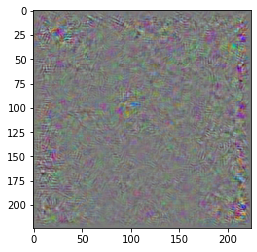

In [47]:
grad_gf = image.grad.data
grad_gf.min()
with torch.no_grad():
    plt.figure
    plt.imshow((grad_gf.transpose(1,3).view([224,224,3]) - grad_gf.min()) / (grad_gf.max() - grad_gf.min() ) )

## Activation Maximization on Raw Images

In [8]:
import torch.optim as optim

In [38]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.01)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,1]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation -0.098
50 steps, Neuron activation 9.585
100 steps, Neuron activation 22.943
150 steps, Neuron activation 36.184
200 steps, Neuron activation 50.090
250 steps, Neuron activation 63.927
300 steps, Neuron activation 77.025
350 steps, Neuron activation 89.272
400 steps, Neuron activation 100.329
450 steps, Neuron activation 110.275
500 steps, Neuron activation 119.572
550 steps, Neuron activation 127.729
600 steps, Neuron activation 135.108
650 steps, Neuron activation 141.826
700 steps, Neuron activation 147.953
750 steps, Neuron activation 153.400
800 steps, Neuron activation 158.382
850 steps, Neuron activation 163.048
900 steps, Neuron activation 167.148
950 steps, Neuron activation 171.216


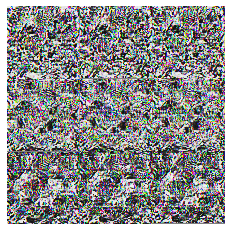

In [47]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [48]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.001)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,5]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.052
50 steps, Neuron activation 1.302
100 steps, Neuron activation 3.106
150 steps, Neuron activation 5.739
200 steps, Neuron activation 9.098
250 steps, Neuron activation 11.922
300 steps, Neuron activation 14.071
350 steps, Neuron activation 15.907
400 steps, Neuron activation 17.531
450 steps, Neuron activation 18.917
500 steps, Neuron activation 20.142
550 steps, Neuron activation 21.330
600 steps, Neuron activation 22.468
650 steps, Neuron activation 23.611
700 steps, Neuron activation 24.759
750 steps, Neuron activation 25.893
800 steps, Neuron activation 27.030
850 steps, Neuron activation 28.168
900 steps, Neuron activation 29.307
950 steps, Neuron activation 30.440


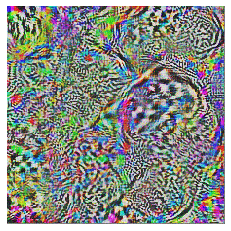

In [49]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [50]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,5]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.051
50 steps, Neuron activation 29.339
100 steps, Neuron activation 58.462
150 steps, Neuron activation 81.571
200 steps, Neuron activation 97.100
250 steps, Neuron activation 108.090
300 steps, Neuron activation 116.139
350 steps, Neuron activation 121.951
400 steps, Neuron activation 126.820
450 steps, Neuron activation 130.617
500 steps, Neuron activation 132.660
550 steps, Neuron activation 135.073
600 steps, Neuron activation 136.957
650 steps, Neuron activation 138.388
700 steps, Neuron activation 139.782
750 steps, Neuron activation 140.945
800 steps, Neuron activation 141.912
850 steps, Neuron activation 142.604
900 steps, Neuron activation 143.175
950 steps, Neuron activation 143.736


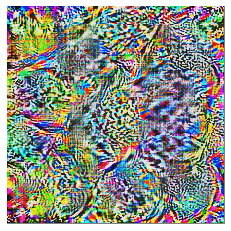

In [51]:
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  orig_size = x.size()


0 steps, Neuron activation -0.099
50 steps, Neuron activation 30.585
100 steps, Neuron activation 59.583
150 steps, Neuron activation 87.844
200 steps, Neuron activation 111.349
250 steps, Neuron activation 130.382
300 steps, Neuron activation 144.717
350 steps, Neuron activation 155.563
400 steps, Neuron activation 165.730
450 steps, Neuron activation 173.396
500 steps, Neuron activation 180.765
550 steps, Neuron activation 186.799
600 steps, Neuron activation 192.701
650 steps, Neuron activation 197.870
700 steps, Neuron activation 202.580
750 steps, Neuron activation 206.553
800 steps, Neuron activation 210.508
850 steps, Neuron activation 213.812
900 steps, Neuron activation 216.874
950 steps, Neuron activation 220.207


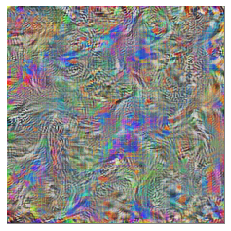

In [102]:
image = 1 * np.random.rand(1, 3, 224, 224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc8'][0,1]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%25==0:
        optimizer.zero_grad()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  orig_size = x.size()


0 steps, Neuron activation 223.182
50 steps, Neuron activation 223.182
100 steps, Neuron activation 223.182
150 steps, Neuron activation 223.182
200 steps, Neuron activation 223.182
250 steps, Neuron activation 223.182
300 steps, Neuron activation 223.182
350 steps, Neuron activation 223.182
400 steps, Neuron activation 223.182
450 steps, Neuron activation 223.182
500 steps, Neuron activation 223.182
550 steps, Neuron activation 223.182
600 steps, Neuron activation 223.182
650 steps, Neuron activation 223.182
700 steps, Neuron activation 223.182
750 steps, Neuron activation 223.182
800 steps, Neuron activation 223.182
850 steps, Neuron activation 223.182
900 steps, Neuron activation 223.182
950 steps, Neuron activation 223.182


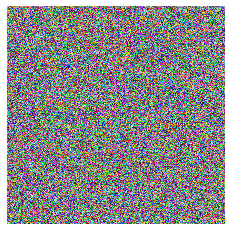

In [106]:
image = 1 * np.random.rand(1, 3, 224, 224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    conv_loss = - blobs['conv5'][0,0,:,:].mean()
    conv_loss.backward()
    optimizer.step()
    if step%25==0:
        optimizer.zero_grad()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -conv_loss.data.item() ))
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [105]:
with torch.no_grad():
    image.transpose_(1,3)

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

In [103]:
# with torch.no_grad():
#     plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
#     plt.axis('off')
# plt.show()
deproc_image = detfmr.deprocess('data', image.data.numpy())
plt.imshow(deproc_image)# .view([224,224,3])
plt.axis('off')
plt.show()

ValueError: operands could not be broadcast together with shapes (224,224,3) (3,1,1) (224,224,3) 

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 0.000
50 steps, Neuron activation 0.000
100 steps, Neuron activation 0.000
150 steps, Neuron activation 0.000
200 steps, Neuron activation 0.000
250 steps, Neuron activation 0.000
300 steps, Neuron activation 0.000
350 steps, Neuron activation 0.000
400 steps, Neuron activation 0.000
450 steps, Neuron activation 0.000
500 steps, Neuron activation 0.000
550 steps, Neuron activation 0.000
600 steps, Neuron activation 0.000
650 steps, Neuron activation 0.000
700 steps, Neuron activation 0.000
750 steps, Neuron activation 0.000
800 steps, Neuron activation 0.000
850 steps, Neuron activation 0.000
900 steps, Neuron activation 0.000
950 steps, Neuron activation 0.000


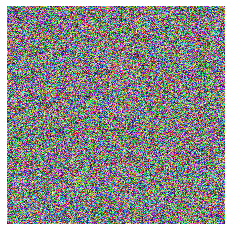

In [15]:
image = 1*np.random.rand(1, 3,224,224)
image = torch.from_numpy(np.float32(image))
image = Variable(image, requires_grad = True)
optimizer = optim.Adam([image], lr=0.05)
for step in range(1000):
    blobs = net(image)
    fc8_1neur_loss = - blobs['fc7'][0,3]
    fc8_1neur_loss.backward()
    optimizer.step()
    if step%50==0:
        print("%d steps, Neuron activation %.3f"%(step, -fc8_1neur_loss.data.item() ))
with torch.no_grad():
    plt.imshow((image.transpose_(1,3).view([224,224,3]) - image.data.min())/ (image.data.max()-image.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [22]:
def load_image(imgfile):
    import caffe
    image = caffe.io.load_image(imgfile)
    transformer = caffe.io.Transformer({'data': (1, 3, args.height, args.width)})
    transformer.set_transpose('data', (2, 0, 1))
    transformer.set_mean('data', np.array([args.meanB, args.meanG, args.meanR]))
    transformer.set_raw_scale('data', args.scale)
    transformer.set_channel_swap('data', (2, 1, 0))
 
    image = transformer.preprocess('data', image)
    image = image.reshape(1, 3, args.height, args.width)
    return image
 
def forward_pytorch(protofile, weightfile, image):
    net = CaffeNet(protofile)
    print(net)
    net.load_weights(weightfile)
    net.eval()
    image = torch.from_numpy(image)
    image = Variable(image)
    blobs = net(image)
    return blobs, net.models

## Activation Maximization Through GAN

In [43]:
for param in net.parameters():
    param.requires_grad = False
for param in Generator.parameters():
    param.requires_grad = False

In [18]:
import copy

In [19]:
GenCNN_pipe = copy.deepcopy(Generator)

In [51]:
import net_utils
import utils
detfmr = net_utils.get_detransformer(net_utils.load('generator'))
tfmr = net_utils.get_transformer(net_utils.load('caffe-net'))

D:\Github\pytorch-caffe\caffenet.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 1.745
10 steps, Neuron activation 3.367
20 steps, Neuron activation 4.259
30 steps, Neuron activation 4.955
40 steps, Neuron activation 5.466
50 steps, Neuron activation 5.798
60 steps, Neuron activation 6.083
70 steps, Neuron activation 6.412
80 steps, Neuron activation 6.742
90 steps, Neuron activation 7.087
100 steps, Neuron activation 7.463
110 steps, Neuron activation 7.901
120 steps, Neuron activation 8.282
130 steps, Neuron activation 8.658
140 steps, Neuron activation 8.957
150 steps, Neuron activation 9.212
160 steps, Neuron activation 9.435
170 steps, Neuron activation 9.605
180 steps, Neuron activation 9.797
190 steps, Neuron activation 9.992


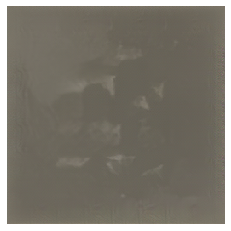

In [52]:
feat = np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
offset = 16
pipe_optimizer = optim.SGD([feat], lr=0.02) # Seems Adam is not so good, Adagrad ... is not so 
for step in range(200): 
    blobs = Generator(feat)
    out_img = blobs['deconv0']
    center_img = out_img[:, :, offset:-offset, offset:-offset]
    blobs_CNN = net(center_img)
    fc8_neuron1 = - blobs_CNN['fc8'][0,1]
    fc8_neuron1.backward()
    pipe_optimizer.step()
    if step%10==0:
        pipe_optimizer.zero_grad()
    if step%10==0:
        print("%d steps, Neuron activation %.3f"%(step, - fc8_neuron1.data.item() ))
# with torch.no_grad():
#     plt.imshow((out_img.view([256,256,3]) - out_img.data.min())/ (out_img.data.max()-out_img.data.min()))# .view([224,224,3])
#     plt.axis('off')
# plt.show()
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(deproc_img)# .view([224,224,3])
plt.axis('off')
plt.show()

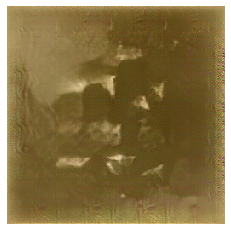

In [53]:
plt.imshow((deproc_img - deproc_img.min())/(deproc_img.max()-deproc_img.min()))# .view([224,224,3])
plt.axis('off')
plt.show()

In [48]:
feat = np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
offset = 16
pipe_optimizer = optim.Adam([feat], lr=0.02) # Seems Adam is not so good, Adagrad ... is not so 
for step in range(500): 
    blobs = Generator(feat)
    out_img = blobs['deconv0']
    center_img = out_img[:, :, offset:-offset, offset:-offset]
    blobs_CNN = net(center_img)
    fc8_neuron1 = - blobs_CNN['fc8'][0,1]
    fc8_neuron1.backward()
    pipe_optimizer.step()
    if step%25==0:
        pipe_optimizer.zero_grad()
    if step%10==0:
        print("%d steps, Neuron activation %.3f"%(step, - fc8_neuron1.data.item() ))
# with torch.no_grad():
#     plt.imshow((out_img.view([256,256,3]) - out_img.data.min())/ (out_img.data.max()-out_img.data.min()))# .view([224,224,3])
#     plt.axis('off')
# plt.show()
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.subplot(1,2,1)
plt.imshow(deproc_img)# .view([224,224,3])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow((deproc_img - deproc_img.min())/(deproc_img.max()-deproc_img.min()))# .view([224,224,3])
plt.axis('off')
plt.show()


NameError: name 'optim' is not defined

D:\Github\pytorch-caffe\caffenet.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 2.134
10 steps, Neuron activation 4.917
20 steps, Neuron activation 7.402
30 steps, Neuron activation 11.216
40 steps, Neuron activation 11.993
50 steps, Neuron activation 14.562
60 steps, Neuron activation 17.876
70 steps, Neuron activation 19.854
80 steps, Neuron activation 23.021
90 steps, Neuron activation 27.467
100 steps, Neuron activation 32.039
110 steps, Neuron activation 38.738
120 steps, Neuron activation 45.341
130 steps, Neuron activation 51.257
140 steps, Neuron activation 53.893
150 steps, Neuron activation 57.668
160 steps, Neuron activation 63.863


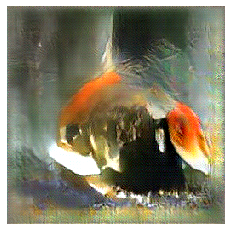

In [56]:
feat = np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
offset = 16
pipe_optimizer = optim.SGD([feat], lr=0.1) # Seems Adam is not so good, Adagrad ... is not so 
for step in range(170): 
    blobs = Generator(feat) # forward the feature vector through the GAN
    out_img = blobs['deconv0'] # get raw output image from GAN
#     deproc_img = detfmr.deprocess('data', out_img.data)#.numpy()
#     deproc_img = torch.clamp(deproc_img, 0, 1)
    center_img = out_img[:, :, offset:-offset, offset:-offset]
    blobs_CNN = net(center_img)
    fc8_neuron1 = - blobs_CNN['fc8'][0,1]
    fc8_neuron1.backward()
    pipe_optimizer.step()
    if step%50==0:
        pipe_optimizer.zero_grad()
    if step%10==0:
        print("%d steps, Neuron activation %.3f"%(step, - fc8_neuron1.data.item() ))
# with torch.no_grad():
#     plt.imshow((out_img.view([256,256,3]) - out_img.data.min())/ (out_img.data.max()-out_img.data.min()))# .view([224,224,3])
#     plt.axis('off')
# plt.show()
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(np.clip(deproc_img, 0, 1))# .view([224,224,3])
plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:201: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x.view(-1, dims))


0 steps, Neuron activation 3.943
10 steps, Neuron activation 6.529
20 steps, Neuron activation 3.994
30 steps, Neuron activation nan
40 steps, Neuron activation nan
50 steps, Neuron activation nan
60 steps, Neuron activation nan
70 steps, Neuron activation nan
80 steps, Neuron activation nan
90 steps, Neuron activation nan


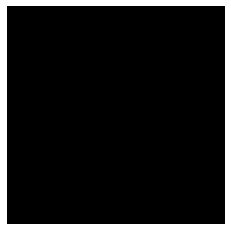

In [61]:
feat = 0.01 * np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
offset = 16
LBFGS_optimizer = torch.optim.LBFGS([feat], lr=5e-2, max_iter=20) # Seems Adam is not so good, Adagrad ... is not so 

for step in range(100): 
    def closure():
        LBFGS_optimizer.zero_grad()
        blobs = Generator(feat) # forward the feature vector through the GAN
        out_img = blobs['deconv0'] # get raw output image from GAN 
        center_img = out_img[:, :, offset:-offset, offset:-offset]
        blobs_CNN = net(center_img)
        fc8_neuron1 = - blobs_CNN['fc8'][0,1]
        fc8_neuron1.backward()
        return fc8_neuron1
    LBFGS_optimizer.step(closure)
    if step%10==0:
        print("%d steps, Neuron activation %.3f"%(step, - closure().data.item() ))

blobs = Generator(feat) # forward the feature vector through the GAN
out_img = blobs['deconv0']
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(np.clip(deproc_img, 0, 1))# .view([224,224,3])
plt.axis('off')
plt.show()

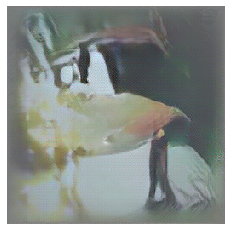

In [98]:
plt.imshow((deproc_img - deproc_img.min())/(deproc_img.max()-deproc_img.min()))# .view([224,224,3])
plt.axis('off')
plt.show()

D:\Github\pytorch-caffe\caffenet.py:199: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  orig_size = x.size()


0 steps, Neuron activation 0.400
10 steps, Neuron activation 32.706
20 steps, Neuron activation 41.643
30 steps, Neuron activation 133.158
40 steps, Neuron activation 205.173
50 steps, Neuron activation 485.860
60 steps, Neuron activation 2149.433
70 steps, Neuron activation 11345.149
80 steps, Neuron activation 12784.990
90 steps, Neuron activation 8546.475


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


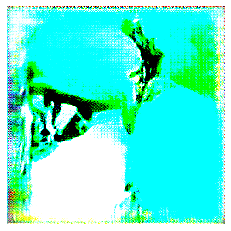

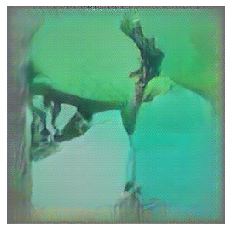

In [92]:
feat = np.random.rand(1, 4096)
feat = torch.from_numpy(np.float32(feat))
feat = Variable(feat, requires_grad = True)
offset = 16
pipe_optimizer = optim.SGD([feat], lr=0.02) # Seems Adam is not so good, Adagrad ... is not so 
for step in range(100): 
    blobs = Generator(feat)
    out_img = blobs['deconv0']
    center_img = out_img[:, :, offset:-offset, offset:-offset]
    blobs_CNN = net(center_img)
#     fc8_neuron1 = - blobs_CNN['fc8'][0,1]
#     fc8_neuron1.backward()
    conv5_33_sum = - blobs_CNN['conv5'][0,100,:,:].sum()
    conv5_33_sum.backward()
    pipe_optimizer.step()
    if step%1==0:
        pipe_optimizer.zero_grad()
    if step%10==0:
        print("%d steps, Neuron activation %.3f"%(step, - conv5_33_sum.data.item() ))
# with torch.no_grad():
#     plt.imshow((out_img.view([256,256,3]) - out_img.data.min())/ (out_img.data.max()-out_img.data.min()))# .view([224,224,3])
#     plt.axis('off')
# plt.show()
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(deproc_img)# .view([224,224,3])
plt.axis('off')
plt.show()
plt.imshow((deproc_img - deproc_img.min())/(deproc_img.max()-deproc_img.min()))# .view([224,224,3])
plt.axis('off')
plt.show()

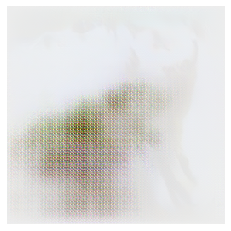

In [87]:
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow((deproc_img - deproc_img.min())/(deproc_img.max()-deproc_img.min()))# .view([224,224,3])
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


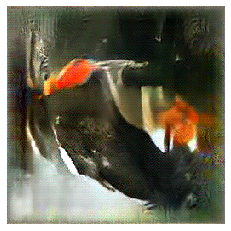

In [49]:
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(deproc_img)# .view([224,224,3])
plt.axis('off')
plt.show()

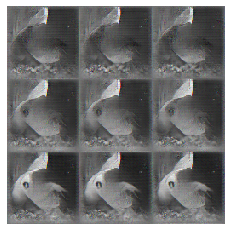

In [35]:
with torch.no_grad():
    plt.imshow((out_img.transpose_.view([256,256,3]) - out_img.data.min())/ (out_img.data.max()-out_img.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

In [38]:
utils.generator

In [39]:
detfmr = net_utils.get_detransformer(net_utils.load('generator'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


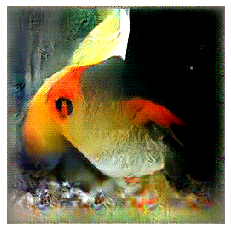

In [47]:
deproc_img = detfmr.deprocess('data', out_img.data.numpy())
plt.imshow(deproc_img)# .view([224,224,3])
plt.axis('off')
plt.show()

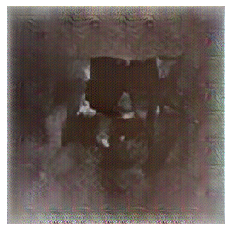

In [12]:
img_gen = blobs['deconv0']
with torch.no_grad():
    plt.imshow((img_gen.view([256,256,3]) - img_gen.data.min())/ (img_gen.data.max()-img_gen.data.min()))# .view([224,224,3])
    plt.axis('off')
plt.show()

## Try ActMax in CaffeNet

In [3]:
import os
from time import time
import re
import utils
from utils import add_neuron_subdir, add_trial_subdir
import utils
import numpy as np
from scipy import stats
import h5py
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [2]:
import net_utils

In [7]:
tfmr = net_utils.get_transformer(caffenet)

In [8]:
tim = tfmr.preprocess('data', img)  # shape=(3, 227, 227)
caffenet.blobs['data'].data[...] = tim
out = caffenet.forward(end='fc8') 